# prediction sur kiki, Faut il parier sur un but de kilian sur WINAMAX ?

### Scikit learn
#### Cherchons sur internet un tableau avec les stats de Mbappe (14/02/25).

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

#URL du profil de kiki
url = "https://fbref.com/en/players/42fd9c7f/Kylian-Mbappe"
# url = "https://fbref.com/en/players/dea698d9/Cristiano-Ronaldo"
# url = "https://fbref.com/en/players/d70ce98e/Lionel-Messi"
headers = {"User-Agent": "Mozilla/5.0"}  # pour ne pas se faire passer pour un bot

# voir si la page nous repond
response = requests.get(url,headers=headers)
soup = BeautifulSoup(response.text,"html.parser")

#### Trouvons le tableau qui nous interesse sur la page internet.

In [2]:
table = soup.find("table", {"id": "stats_standard_dom_lg"})

# Récupérer uniquement la dernière ligne d'en-têtes (la plus précise)
header_rows = table.find("thead").find_all("tr")
last_header = header_rows[-1]  
columns = [th.text.strip() for th in last_header.find_all("th")]

# Vérifier combien de colonnes ont été extraites
print(f"Nombre de colonnes trouvées: {len(columns)}")
print(f"Colonnes: {columns}")


AttributeError: 'NoneType' object has no attribute 'find'

#### Preparons une df avec les stats et parametres que nous estimons important par rapport a l'effcassite devant le but de kiki.

In [ ]:

# Extraire les données du tableau
data = []
for row in table.find("tbody").find_all("tr"):
    cols = row.find_all(["th", "td"])
    row_data = [col.text.strip() for col in cols]
    
    # Vérifier que la ligne a bien le bon nombre de colonnes
    if len(row_data) == len(columns):
        data.append(row_data)
    else:
        print(f"⚠️ Problème avec cette ligne (ignore) : {row_data}")

# Convertir en DataFrame
df = pd.DataFrame(data, columns=columns)
df = df.fillna(0)

# Afficher un aperçu du DataFrame
print(df.head())


      Season Age      Squad Country        Comp LgRank  MP Starts    Min  \
0  2004-2005  17  Barcelona  es ESP  1. La Liga    1st   7      0     70   
1  2005-2006  18  Barcelona  es ESP  1. La Liga    1st  17     11    911   
2  2006-2007  19  Barcelona  es ESP  1. La Liga    2nd  26     23  1,983   
3  2007-2008  20  Barcelona  es ESP  1. La Liga    3rd  27     23  1,973   
4  2008-2009  21  Barcelona  es ESP  1. La Liga    1st  31     27  2,516   

    90s  ...   Ast   G+A  G-PK G+A-PK xG xAG xG+xAG npxG npxG+xAG  Matches  
0   0.8  ...  0.00  1.29  1.29   1.29                              Matches  
1  10.1  ...  0.30  0.89  0.59   0.89                              Matches  
2  22.0  ...  0.14  0.77  0.64   0.77                              Matches  
3  21.9  ...  0.55  1.00  0.27   0.82                              Matches  
4  28.0  ...  0.39  1.22  0.72   1.11                              Matches  

[5 rows x 36 columns]


In [ ]:
colone_d_analyse = ["Season","Squad","Comp","MP","Min","Gls",'Ast','G+A','xG', 'npxG', 'xAG', 'npxG+xAG']
df_filtre= df[colone_d_analyse]
print(df_filtre)

       Season        Squad        Comp  MP    Min Gls   Gls Ast   Ast G+A  \
0   2004-2005    Barcelona  1. La Liga   7     70   1  1.29   0  0.00   1   
1   2005-2006    Barcelona  1. La Liga  17    911   6  0.59   3  0.30   9   
2   2006-2007    Barcelona  1. La Liga  26  1,983  14  0.64   3  0.14  17   
3   2007-2008    Barcelona  1. La Liga  27  1,973  10  0.46  12  0.55  22   
4   2008-2009    Barcelona  1. La Liga  31  2,516  23  0.82  11  0.39  34   
5   2009-2010    Barcelona  1. La Liga  35  2,805  34  1.09   9  0.29  43   
6   2010-2011    Barcelona  1. La Liga  33  2,858  31  0.98  19  0.60  50   
7   2011-2012    Barcelona  1. La Liga  37  3,270  50  1.38  16  0.44  66   
8   2012-2013    Barcelona  1. La Liga  32  2,650  46  1.56  11  0.37  57   
9   2013-2014    Barcelona  1. La Liga  31  2,501  28  1.01  11  0.40  39   
10  2014-2015    Barcelona  1. La Liga  38  3,375  43  1.15  18  0.48  61   
11  2015-2016    Barcelona  1. La Liga  33  2,729  26  0.86  14  0.46  40   

### Realisons quelques analyses preliminaire par rapport au stats de notre kiki national.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df['Saison_num'] = df['Season'].apply(lambda x: int(x.split('-')[1]))
x =df['Saison_num']
Gls = pd.to_numeric(df[['Gls']].iloc[:, 0] , errors='coerce')

slope, intercept, r_value, p_value, std_err = stats.linregress(x, Gls)

plt.plot(x,Gls,marker='o',label='Buts')
plt.plot(x,slope*x+intercept,label="Tendance", linestyle="--")
plt.xlabel('annee')
plt.ylabel('Buts')
plt.title('Tendance des buts de Kiki')
plt.legend()
plt.show

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### Corrélation entre xG et buts

In [ ]:
xG = pd.to_numeric(df[['xG']].iloc[:, 0] , errors='coerce')
correlation = xG.corr(Gls)
print(f"Corrélation entre xG et buts : {correlation}")

# xG = pd.to_numeric(df[['xG']].iloc[:, 0] , errors='coerce')
# correlation = xG.corr(Gls)
# print(f"Corrélation entre xG et buts : {correlation}")

Corrélation entre xG et buts : 0.9970878705691588
Corrélation entre xG et buts : 0.9970878705691588


#### Tracons les XG contre les buts marque de mbappe sur toutes ses saisons pro de sa carirere.

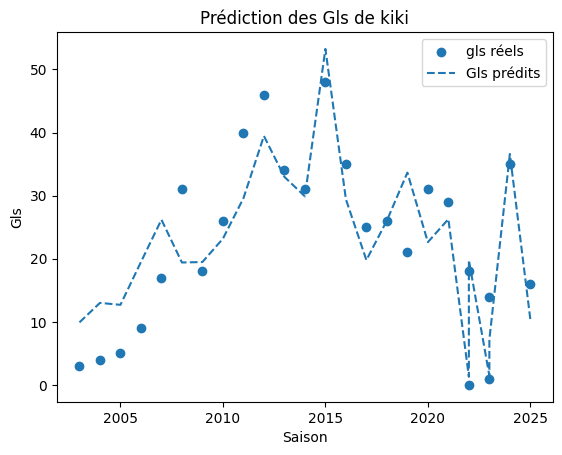

In [ ]:
from sklearn.linear_model import LinearRegression

# 
df = df.fillna(0)
Ast =pd.to_numeric(df[['Ast']].iloc[:, 0] , errors='coerce')
MP = pd.to_numeric(df['MP'], errors='coerce')
xAG = pd.to_numeric(df[['xAG']].iloc[:, 0] , errors='coerce')
x_saison =df['Saison_num']

# Préparer les données
x = pd.DataFrame({'MP': MP,'Ast': Ast,'xG': xG,'xAG': xAG})
x = x.fillna(0)


# Créer le modèle
model = LinearRegression()
model.fit(x, Gls)

# Prédire les buts
df['Gls_predits'] = model.predict(x)


# Tracer les prédictions contre les vrais buts
plt.scatter(x_saison, Gls, label="gls réels")
plt.plot(x_saison, df['Gls_predits'], label="Gls prédits", linestyle="--")
plt.xlabel('Saison')
plt.ylabel('Gls')
plt.title('Prédiction des Gls de kiki')
plt.legend()
plt.show()

#### Creons un model pour determiner le nombre de but de Mbappe sur un nombre de match choisie.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t

df = df.fillna(0)

x
# Créer et entraîner le modèle de régression
model = LinearRegression()
model.fit(x, Gls)

# Prédire les buts pour la prochaine saison (avec 30 matchs joués)
future_data = pd.DataFrame({
    'MP': [30],  # 30 matchs
    'Ast': Ast.mean(),  # Moyenne des passes décisives passées
    'xG': xG.mean(),  # Moyenne des xG passés
    'xAG': xAG.mean()  # Moyenne des xAG passés
})

predicted_goals = model.predict(future_data)[0]

# Calculer l'erreur standard et l'intervalle de confiance à 95%
y_pred = model.predict(x)
residuals = Gls - y_pred  # Erreurs du modèle
std_error = np.std(residuals)  # Écart-type des erreurs
n = len(Gls)  # Nombre d'échantillons
t_value = t.ppf(0.975, df=n-1)  # Valeur critique pour un IC à 95%

margin_error = t_value * (std_error / np.sqrt(n))  # Marge d'erreur
lower_bound = predicted_goals - margin_error  # Borne inférieure
upper_bound = predicted_goals + margin_error  # Borne supérieure

# Afficher le résultat
print(f"📊 Prédiction pour 30 matchs : {predicted_goals:.2f} buts")
print(f"🔍 Intervalle de confiance à 95% : [{lower_bound:.2f} - {upper_bound:.2f}] buts")

📊 Prédiction pour 30 matchs : 28.00 buts
🔍 Intervalle de confiance à 95% : [25.27 - 30.72] buts


#### Clusters des saisons de Mbappé

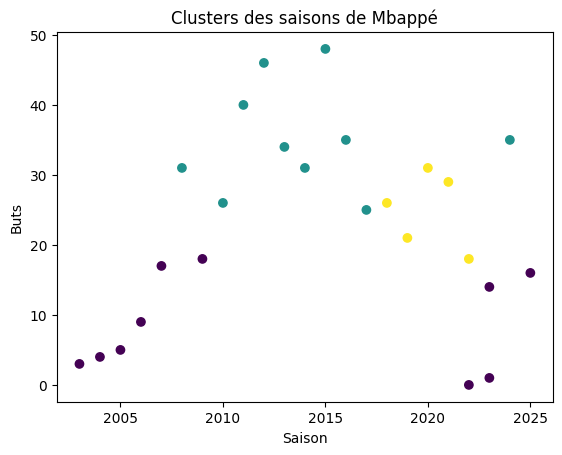

In [ ]:
from sklearn.cluster import KMeans

# On sélectionne les caractéristiques à utiliser pour le clustering
# ["Season","Squad","Comp","MP","Min","Gls",'Ast','G+A','xG', 'npxG', 'xAG', 'npxG+xAG']


Xx = pd.DataFrame({'MP': MP,'Gls': Gls,'xG': xG,'Ast': Ast})
Xx = Xx.fillna(0)

# Appliquer le KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(Xx)

# Visualiser les clusters
plt.scatter(df['Saison_num'], Gls, c=df['Cluster'], cmap='viridis')
plt.xlabel('Saison')
plt.ylabel('Buts')
plt.title('Clusters des saisons de Mbappé')
plt.show()


#### Essayons de détecter des anomalies de buts sur les saison pro de Mbappe.

In [ ]:
from sklearn.ensemble import IsolationForest

# On utilise Isolation Forest pour détecter des anomalies sur les buts
model = IsolationForest(contamination=0.1)  # 10% des données sont considérées comme des anomalies
# df['Anomalie'] = model.fit_predict(df[['Buts']])
df['Anomalie'] = model.fit_predict(df[['Gls']])

# Afficher les anomalies
df_anomalies = df[df['Anomalie'] == -1]
print(df_anomalies)


       Season Age        Squad Country        Comp LgRank  MP Starts    Min  \
9   2011-2012  26  Real Madrid  es ESP  1. La Liga    1st  38     37  3,350   
12  2014-2015  29  Real Madrid  es ESP  1. La Liga    2nd  35     35  3,100   
19  2021-2022  36     Juventus  it ITA  1. Serie A    4th   1      0     31   

     90s  ...    xG   xAG xG+xAG  npxG npxG+xAG  Matches Saison_num  \
9   37.2  ...                                    Matches       2012   
12  34.4  ...                                    Matches       2015   
19   0.3  ...  0.44  0.17   0.61  0.44     0.61  Matches       2022   

   Gls_predits Cluster Anomalie  
9    39.454395       1       -1  
12   53.253341       1       -1  
19    1.284583       0       -1  

[3 rows x 40 columns]


#### Realisons de simple Statistiques descriptives des buts/saison.

In [ ]:
# Statistiques descriptives des buts
print(Gls.describe())


count    25.000000
mean     22.520000
std      13.859774
min       0.000000
25%      14.000000
50%      25.000000
75%      31.000000
max      48.000000
Name: Gls, dtype: float64


#### (05/06/25) Maintenant que nous savons que kilian est soulier d or, essayons de voir si notre model est alligner avec la premiere saison de kilian au REAL MADRID.

In [ ]:


# import plotly.express as px

# # Vérifier les colonnes et filtrer les NaN
# if 'Season' in df.columns and 'Gls' in df.columns:
#     df = df.dropna(subset=['Season', 'Gls'])
#     df['Season'] = df['Season'].astype(str)  # Si besoin, convertir en string

#     # Tracer le graphique interactif
#     fig = px.line(df, x='Season', y='Gls', title="Évolution des buts de Kiki")
#     fig.show()
# else:
#     print("Les colonnes 'Season' ou 'Gls' sont manquantes dans le DataFrame.")


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().